In [32]:
# Initial imports
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

In [33]:
 # Set path to CSV and read in CSV
csv_path = Path("DATA/BCH/BCH_DATA.csv")
bch_df=pd.read_csv(csv_path)

In [34]:
 # Set index as Date
bch_df = bch_df.set_index(pd.to_datetime(bch_df["Date"], infer_datetime_format=True))

# Display sample data
bch_df.head(10)

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,,
2018-05-31,BCH,2018-05-31,988.508185,1000.022860,1009.098005,984.241607
2018-06-01,BCH,2018-06-01,1004.699341,996.425004,1012.734857,979.128068
2018-06-02,BCH,2018-06-02,1071.102569,1002.343366,1100.516301,992.421075
2018-06-03,BCH,2018-06-03,1163.478967,1083.841395,1195.747117,1070.126389
2018-06-04,BCH,2018-06-04,1114.227267,1166.412662,1212.603625,1074.647407
2018-06-05,BCH,2018-06-05,1147.077272,1114.227267,1159.599472,1047.306037
2018-06-06,BCH,2018-06-06,1128.990000,1147.990000,1160.062100,1099.906836
2018-06-07,BCH,2018-06-07,1143.230000,1128.990000,1167.000000,1127.020000
2018-06-08,BCH,2018-06-08,1115.220000,1143.230000,1148.500000,1087.110000


In [35]:
#check for na
bch_df.isnull().values.any()

False

In [36]:
# Set the random seed to (2)
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [37]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [38]:
# Define the window size
window_size = 9

# Set the index of the feature and target columns
feature_column = 2
target_column = 2

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(bch_df, window_size, feature_column, target_column)

# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[ 988.50818539 1004.69934074 1071.10256902 1163.47896686 1114.22726693
  1147.07727228 1128.99       1143.23       1115.22      ]
 [1004.69934074 1071.10256902 1163.47896686 1114.22726693 1147.07727228
  1128.99       1143.23       1115.22       1086.37150643]
 [1071.10256902 1163.47896686 1114.22726693 1147.07727228 1128.99
  1143.23       1115.22       1086.37150643  938.364966  ]] 

y sample values:
[[1086.37150643]
 [ 938.364966  ]
 [ 947.50682138]]


In [39]:
 # Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [40]:
 # Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [41]:
 # Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.62804833]
  [0.63920264]
  [0.68494877]
  [0.74858817]
  [0.71465798]
  [0.73728881]
  [0.72482823]
  [0.73463837]
  [0.71534189]]

 [[0.63920264]
  [0.68494877]
  [0.74858817]
  [0.71465798]
  [0.73728881]
  [0.72482823]
  [0.73463837]
  [0.71534189]
  [0.69546775]]

 [[0.68494877]
  [0.74858817]
  [0.71465798]
  [0.73728881]
  [0.72482823]
  [0.73463837]
  [0.71534189]
  [0.69546775]
  [0.59350396]]] 

X_test sample values:
[[[0.15275536]
  [0.15580687]
  [0.13930414]
  [0.14243493]
  [0.1516816 ]
  [0.15029933]
  [0.1562885 ]
  [0.15835258]
  [0.17110851]]

 [[0.15580687]
  [0.13930414]
  [0.14243493]
  [0.1516816 ]
  [0.15029933]
  [0.1562885 ]
  [0.15835258]
  [0.17110851]
  [0.15918832]]

 [[0.13930414]
  [0.14243493]
  [0.1516816 ]
  [0.15029933]
  [0.1562885 ]
  [0.15835258]
  [0.17110851]
  [0.15918832]
  [0.14726212]]]


In [42]:
 # Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [43]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 9
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [44]:
 # Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [45]:
# Show the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 9, 9)              396       
_________________________________________________________________
dropout_3 (Dropout)          (None, 9, 9)              0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 9, 9)              684       
_________________________________________________________________
dropout_4 (Dropout)          (None, 9, 9)              0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 9)                 684       
_________________________________________________________________
dropout_5 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [46]:
# Train the model
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=90, verbose=1)

Epoch 1/10
9/9 [==============================] - 5s 9ms/step - loss: 0.0298
Epoch 2/10
9/9 [==============================] - 0s 9ms/step - loss: 0.0171
Epoch 3/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0119
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0102
Epoch 5/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0086
Epoch 6/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0081
Epoch 7/10
9/9 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 8/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0067
Epoch 9/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0064
Epoch 10/10
9/9 [==============================] - 0s 8ms/step - loss: 0.0057


In [62]:
 # Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [63]:
predicted.shape

(344, 1)

In [64]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [65]:
 # Create a DataFrame of Real and Predicted values
bch_eval = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = bch_df.index[-len(real_prices): ]) 

# Show the DataFrame's head
bch_eval.head()

,Actual,Predicted
Date,,
2020-08-18,307.929854,302.193665
2020-08-19,290.618265,302.567871
2020-08-20,292.028089,302.648499
2020-08-21,285.998217,304.952118
2020-08-22,285.993489,306.641998


<AxesSubplot:title={'center':'Actual Vs. Predicted BCH Prices'}, xlabel='Date'>

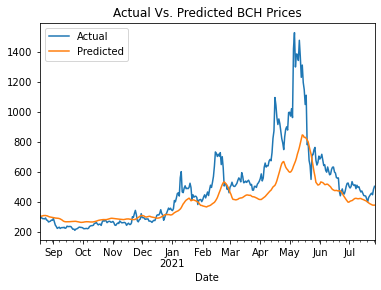

In [66]:
 # Plot the real vs predicted prices as a line chart
bch_eval.plot(title="Actual Vs. Predicted BCH Prices")

In [67]:
#seprate actual and pred
Pred= bch_eval['Actual']
act= bch_eval['Predicted']

#model eval
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(act, Pred))
print(math.sqrt(mean_squared_error(act, Pred)))
print(mean_absolute_error(act, Pred))

28321.666465254402
168.29042297544564
103.53344638512407


In [68]:
#create buy and sell signals 
#calculate profit and loss

#create 'profit/loss' column to track trade metrics
bch_eval['profit/loss'] = np.nan

#create column to hold buy and cell signals
bch_eval['signals'] = np.nan

#create buy and sell list containers
buy = []
sell = []

#create column that has next days price
bch_eval['next_day'] = bch_eval["Predicted"].shift(-1)

In [69]:
#create loop that buys if next day price is higer and sells if next day price goes down
for index, row in bch_eval.iterrows():

    if row["Predicted"] > row["next_day"]:
        bch_eval.loc[index, "signals"] = "buy"
        buy.append(row["Actual"])
        bch_eval.loc[index, "profit/loss"] = 0
    elif row["Predicted"] < row["next_day"]:
        bch_eval.loc[index, "signals"] = "sell"
        sell.append(row["Actual"])
        #bch_eval.loc[index, "profit/loss"] = sell[-1] - buy[-1]
    else:
        bch_eval.loc[index, "signals"] = "hold"


In [70]:
#create loop that buys if next day price is higer and sells if next day price goes down
for index, row in bch_eval.iterrows():

    if row["Predicted"] > row["next_day"]:
        bch_eval.loc[index, "signals"] = "buy"
        buy.append(row["Actual"])
        bch_eval.loc[index, "profit/loss"] = 0
    elif row["Predicted"] < row["next_day"]:
        bch_eval.loc[index, "signals"] = "sell"
        sell.append(row["Actual"])
        bch_eval.loc[index, "profit/loss"] = sell[-1] - buy[-1]
    else:
        bch_eval.loc[index, "signals"] = "hold"


In [71]:
bch_eval.dropna(inplace= True)

In [72]:
bch_eval

,Actual,Predicted,profit/loss,signals,next_day
Date,,,,,
2020-08-18,307.929854,302.193665,-137.689748,sell,302.567871
2020-08-19,290.618265,302.567871,-155.001337,sell,302.648499
2020-08-20,292.028089,302.648499,-153.591513,sell,304.952118
2020-08-21,285.998217,304.952118,-159.621385,sell,306.641998
2020-08-22,285.993489,306.641998,-159.626113,sell,306.788025
...,...,...,...,...,...
2021-07-22,438.670752,386.424652,0.000000,buy,382.997742
2021-07-23,448.685037,382.997742,0.000000,buy,378.880035
2021-07-24,455.970324,378.880035,0.000000,buy,376.494354


In [73]:
# calculate total profit/loss and percent return for 1000 total coins

# total amount of initial capital
initial_capital = 100000

# set total amount of coins
coin_order = 100

# calculate total profit/loss
total_profit_loss = round(bch_eval["profit/loss"].sum() * coin_order, 2)

# calculate return on investemnt 
roi = round((total_profit_loss / initial_capital) * 100, 2)

# display profit/loss and roi
print(
    f"The total profit/loss of the trading model is ${total_profit_loss}, "
    f"with the total return on investment being {roi}%"
)

The total profit/loss of the trading model is $1279881.08, with the total return on investment being 1279.88%


<AxesSubplot:title={'center':'Actual Vs. Predicted BCH Prices'}, xlabel='Date'>

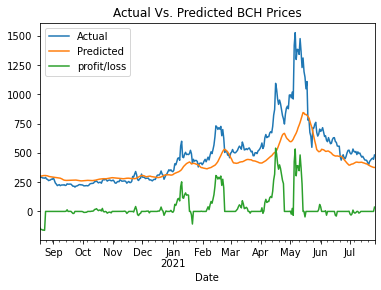

In [79]:
#display plot for presentation 
bch_eval2 = bch_eval.copy()

#drop next day 
bch_eval2.drop('next_day', axis=1, inplace=True)

bch_eval2.plot(title="Actual Vs. Predicted BCH Prices")